In [1]:
#Implementación incremental 
import gym
import numpy as np
import matplotlib.pyplot as plt
import pickle

class Agente:
    def __init__(self, env_name, num_bins=10, episodes=10, learning_rate=0.5, discount_factor=0.95, epsilon=1, epsilon_decay_rate=0.0001, render=False):
        self.env = gym.make(env_name, render_mode="human" if render else None)
        self.num_bins = num_bins
        self.episodes = episodes
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.rewards_per_episode = np.zeros(episodes)
        self.epsilon_decay_rate = epsilon_decay_rate
        self.q_table = np.zeros([num_bins] * len(self.env.observation_space.low) + [self.env.action_space.n])
        self.counts = np.zeros([num_bins] * len(self.env.observation_space.low) + [self.env.action_space.n])
        self.rng = np.random.default_rng()
        self.bins = self.create_bins()

    def create_bins(self):
        bins = []
        for i in range(len(self.env.observation_space.low)):
            bins.append(np.linspace(self.env.observation_space.low[i], self.env.observation_space.high[i], self.num_bins + 1)[1:-1])
        return bins

    def discretize_state(self, state):
        discrete_state = tuple(
            np.digitize(state[i], self.bins[i]) - 1 for i in range(len(state))
        )
        return discrete_state

    def choose_action(self, state):
        discrete_state = self.discretize_state(state)
        if self.rng.random() < self.epsilon:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.q_table[discrete_state])

    def update_q_table(self, state, action, reward, next_state):
        discrete_state = self.discretize_state(state)
        new_discrete_state = self.discretize_state(next_state)
        self.counts[discrete_state + (action,)] += 1
        alpha = 1 / self.counts[discrete_state + (action,)]
        self.q_table[discrete_state + (action,)] += alpha * (
            reward + self.discount_factor * np.max(self.q_table[new_discrete_state]) - self.q_table[discrete_state + (action,)]
        )

    def train(self, is_training=False, render=False):
        self.env = gym.make("LunarLander-v2", render_mode="human" if render else None)
        if not is_training:
            with open("lunar_lander_II.pkl", "rb") as f:
                self.q_table = pickle.load(f)

        for i in range(self.episodes):
            state = self.env.reset()[0]
            terminated = False
            truncated = False
            while not terminated and not truncated:
                action = self.choose_action(state)
                next_state, reward, terminated, truncated, _ = self.env.step(action)
                if is_training:
                    self.update_q_table(state, action, reward, next_state)
                state = next_state
            self.epsilon = max(self.epsilon - self.epsilon_decay_rate, 0)
            self.rewards_per_episode[i] = reward
            if (i+1) % 100 == 0:
                print(f"Episode: {i+1} - reward: {self.rewards_per_episode[i]}")
        self.env.close()
        
        if is_training:
            with open("lunar_lander_II.pkl", "wb") as f:
                pickle.dump(self.q_table, f)

    def graficar(self):
        plt.plot(self.rewards_per_episode)
        plt.xlabel("Episodios")
        plt.ylabel("Recompensa")
        plt.title("Recompensa por episodio")
        plt.show()
        

In [2]:

agenteTrain = Agente(env_name="LunarLander-v2", episodes=5000)
agenteTrain.train(is_training=True, render=False)

c:\Python312\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode: 100 - reward: -100.0
Episode: 200 - reward: -100.0
Episode: 300 - reward: -100.0
Episode: 400 - reward: -100.0
Episode: 500 - reward: -100.0
Episode: 600 - reward: -100.0
Episode: 700 - reward: -100.0
Episode: 800 - reward: -100.0
Episode: 900 - reward: -100.0
Episode: 1000 - reward: -100.0
Episode: 1100 - reward: -100.0
Episode: 1200 - reward: -100.0
Episode: 1300 - reward: -100.0
Episode: 1400 - reward: -100.0
Episode: 1500 - reward: -100.0
Episode: 1600 - reward: -100.0
Episode: 1700 - reward: -100.0
Episode: 1800 - reward: -100.0
Episode: 1900 - reward: -100.0
Episode: 2000 - reward: -100.0
Episode: 2100 - reward: -100.0
Episode: 2200 - reward: -100.0
Episode: 2300 - reward: -100.0
Episode: 2400 - reward: -100.0
Episode: 2500 - reward: -100.0
Episode: 2600 - reward: -100.0
Episode: 2700 - reward: -100.0
Episode: 2800 - reward: -100.0
Episode: 2900 - reward: -100.0
Episode: 3000 - reward: -100.0
Episode: 3100 - reward: -100.0
Episode: 3200 - reward: -100.0
Episode: 3300 - r

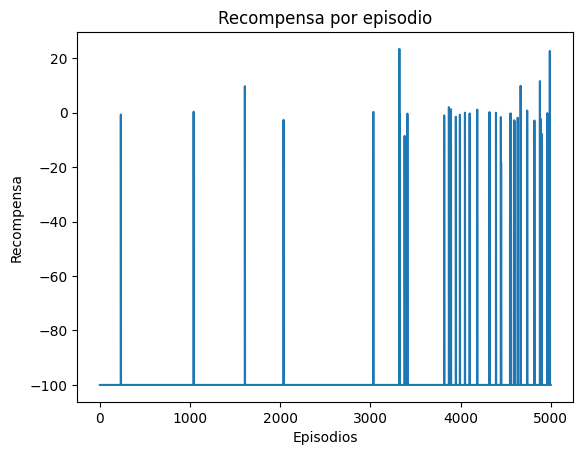

In [3]:
agenteTrain.graficar()

In [4]:
agenteTest = Agente("LunarLander-v2", episodes=5)
agenteTest.train(is_training=False, render=True)